In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
ticker = "GOOG"
data = yf.download(ticker, start="2010-01-01", end="2020-12-31")
prices = data["Close"].values.reshape(-1, 1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:

# Normalize data to [0, 1]
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [4]:

# Create sequences (X: past 10 days, y: next day)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(prices_scaled, seq_length)

In [5]:

# Split into train/test (80/20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:

# Build RNN model
model = Sequential([
    SimpleRNN(32, input_shape=(seq_length, 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='sgd', loss='mse')

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:

# Train
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.8470e-04 - val_loss: 0.0063
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.4466e-04 - val_loss: 0.0056
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3249e-04 - val_loss: 0.0068
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3161e-04 - val_loss: 0.0055
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3952e-04 - val_loss: 0.0062
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3511e-04 - val_loss: 0.0054
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5093e-04 - val_loss: 0.0062
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2561e-04 - val_loss: 0.0070
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3307e-04 - val_loss: 0.0054
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3479e-04 - val_loss: 0.0051
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3837e-04 - val_loss: 0.0048
Epoch 12/20
56/56 ━━

In [8]:

# Predict on test data
y_pred = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [9]:

# Inverse scaling for actual vs. predicted
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

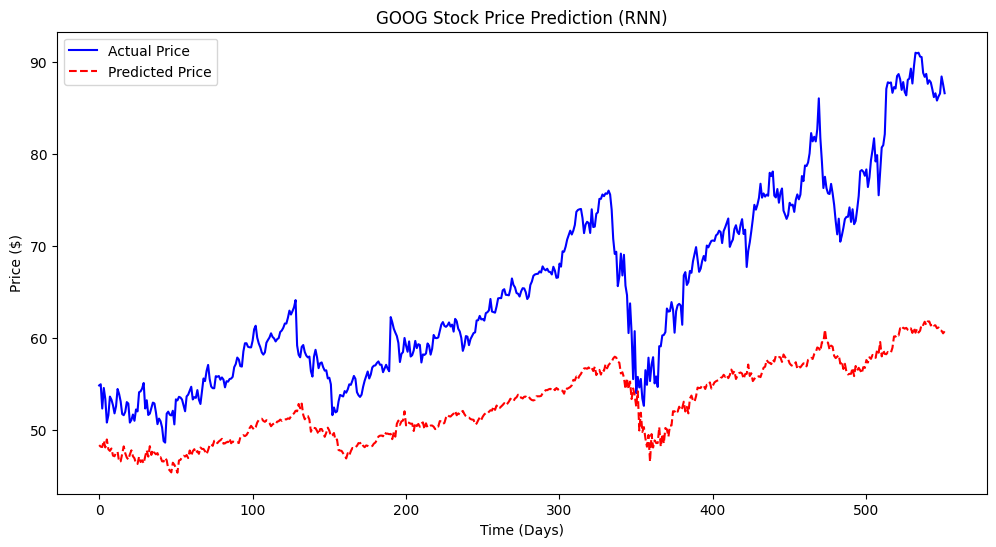

In [10]:

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Price", color='blue')
plt.plot(y_pred_actual, label="Predicted Price", color='red', linestyle='--')
plt.title(f"{ticker} Stock Price Prediction (RNN)")
plt.xlabel("Time (Days)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [11]:

# Print MSE
mse = np.mean((y_test_actual - y_pred_actual) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 194.36


In [12]:

# Analysis
print("""
Analysis:
1. **SimpleRNN** captures temporal patterns but struggles with long-term dependencies (LSTMs/GRUs are better for complex trends).
2. **SGD Optimizer**: Converges slowly; tuning the learning rate (e.g., `optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)`) may help.
3. **Sequence Length**: Increasing `seq_length` (e.g., 30 days) might improve context but requires more data.
""")


Analysis:
1. **SimpleRNN** captures temporal patterns but struggles with long-term dependencies (LSTMs/GRUs are better for complex trends).
2. **SGD Optimizer**: Converges slowly; tuning the learning rate (e.g., `optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)`) may help.
3. **Sequence Length**: Increasing `seq_length` (e.g., 30 days) might improve context but requires more data.

